In [1]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
class RandomForestClassifierScratch:
    def __init__(self, n_trees=10, max_features=None, max_depth=None):
        self.n_trees = n_trees
        self.max_features = max_features
        self.max_depth = max_depth
        self.trees = []

    def bootstrap_sample(self, X, y):
        indices = np.random.choice(len(X), size=len(X), replace=True)
        return X[indices], y[indices]

    def fit(self, X, y):
        self.trees = []
        for _ in range(self.n_trees):
            X_sample, y_sample = self.bootstrap_sample(X, y)
            tree = DecisionTreeClassifier(max_features=self.max_features, max_depth=self.max_depth)
            tree.fit(X_sample, y_sample)
            self.trees.append(tree)

    def predict(self, X):
        tree_preds = np.array([tree.predict(X) for tree in self.trees])
        return np.apply_along_axis(lambda x: np.bincount(x).argmax(), axis=0, arr=tree_preds)

    def plot_tree(self, index):
        tree = self.trees[index]
        plt.figure(figsize=(12, 8))
        from sklearn.tree import plot_tree
        plot_tree(tree, filled=True)
        plt.title(f"Decision Tree {index+1}")
        plt.show()


In [ ]:
dataset = pd.read_csv('ads.csv')

In [4]:
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [5]:
dataset.describe(include='all')

,User ID,Gender,Age,EstimatedSalary,Purchased
count,4.000000e+02,400,400.000000,400.000000,400.000000
unique,NaN,2,NaN,NaN,NaN
top,NaN,Female,NaN,NaN,NaN
freq,NaN,204,NaN,NaN,NaN
mean,1.569154e+07,NaN,37.655000,69742.500000,0.357500
std,7.165832e+04,NaN,10.482877,34096.960282,0.479864
min,1.556669e+07,NaN,18.000000,15000.000000,0.000000
25%,1.562676e+07,NaN,29.750000,43000.000000,0.000000
50%,1.569434e+07,NaN,37.000000,70000.000000,0.000000
75%,1.575036e+07,NaN,46.000000,88000.000000,1.000000


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [7]:
dataset['Gender']=dataset['Gender'].map({'Male':1, 'Female':0})

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   User ID          400 non-null    int64
 1   Gender           400 non-null    int64
 2   Age              400 non-null    int64
 3   EstimatedSalary  400 non-null    int64
 4   Purchased        400 non-null    int64
dtypes: int64(5)
memory usage: 15.8 KB


In [9]:
dataset.drop('User ID', axis=1, inplace=True)

In [13]:
X =dataset.drop('Purchased', axis=1).values
y = dataset['Purchased'].values

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [15]:
rf = RandomForestClassifierScratch(n_trees=3, max_features=2, max_depth=3)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

In [16]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.8375
              precision    recall  f1-score   support

           0       0.87      0.88      0.87        51
           1       0.79      0.76      0.77        29

    accuracy                           0.84        80
   macro avg       0.83      0.82      0.82        80
weighted avg       0.84      0.84      0.84        80



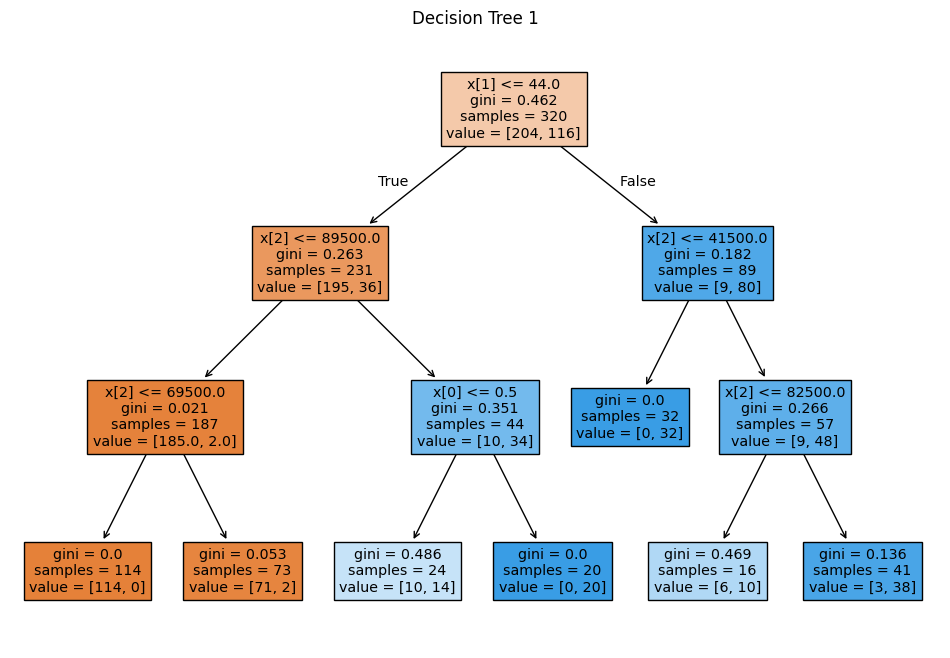

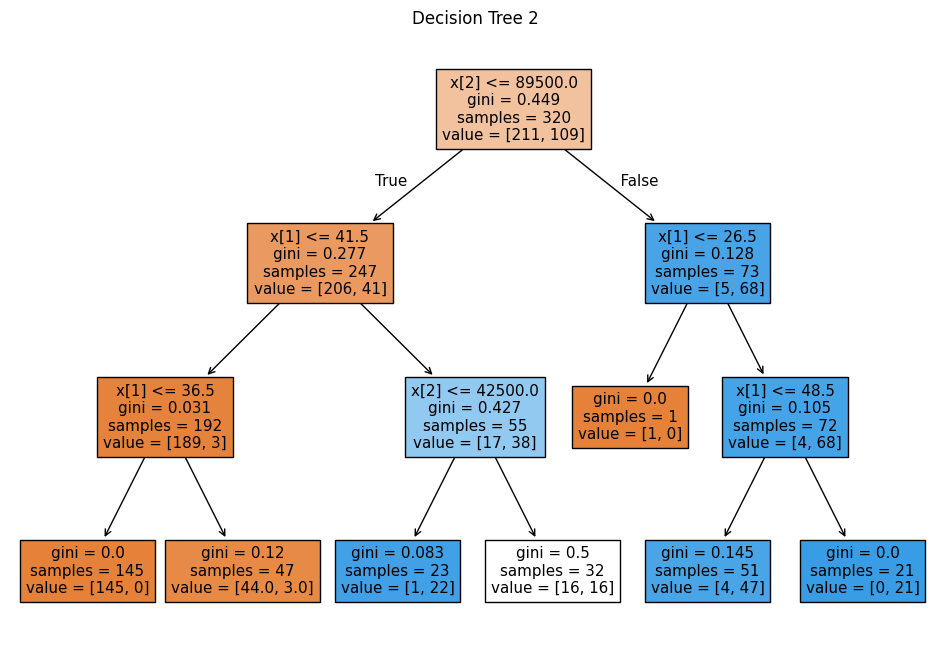

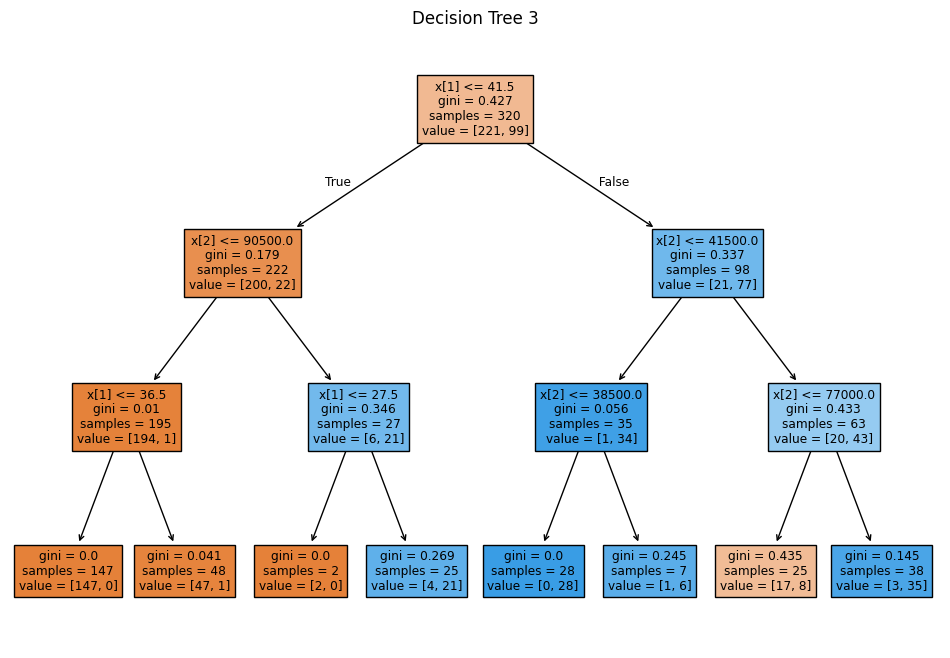

In [17]:
for i in range(3):
    rf.plot_tree(i)

In [18]:
# Train Random Forest from scratch on diff parameters
rf2 = RandomForestClassifierScratch(n_trees=5, max_features=2, max_depth=4)
rf2.fit(X_train, y_train)

y_pred = rf2.predict(X_test)

In [20]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.8875
              precision    recall  f1-score   support

           0       0.90      0.92      0.91        51
           1       0.86      0.83      0.84        29

    accuracy                           0.89        80
   macro avg       0.88      0.87      0.88        80
weighted avg       0.89      0.89      0.89        80



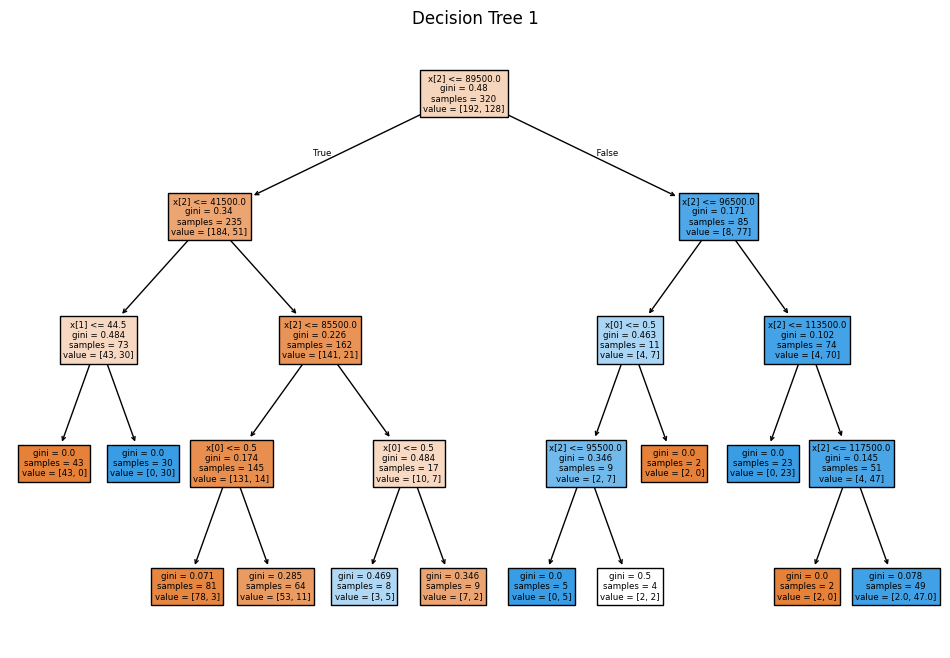

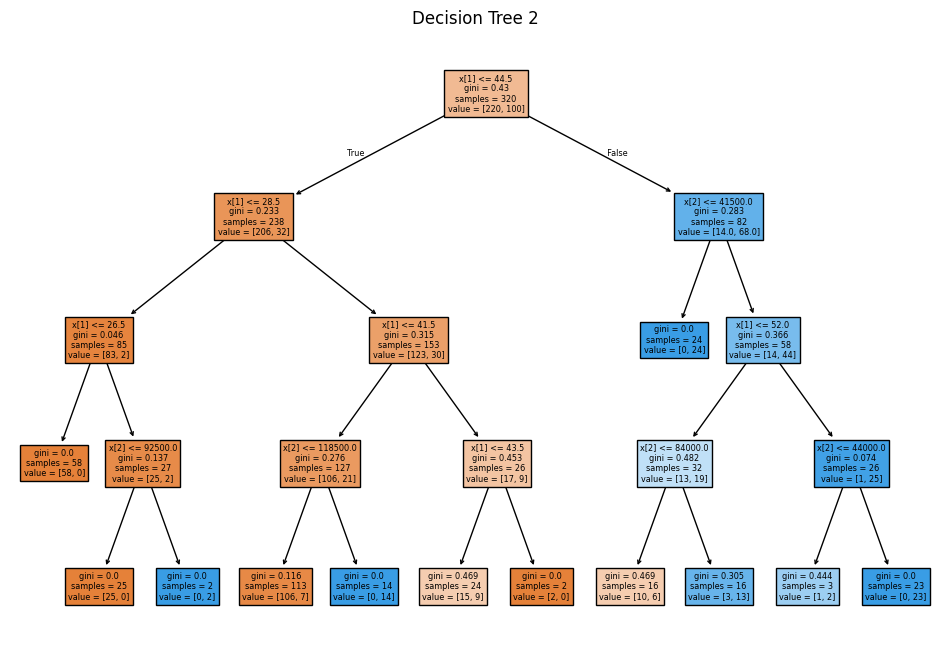

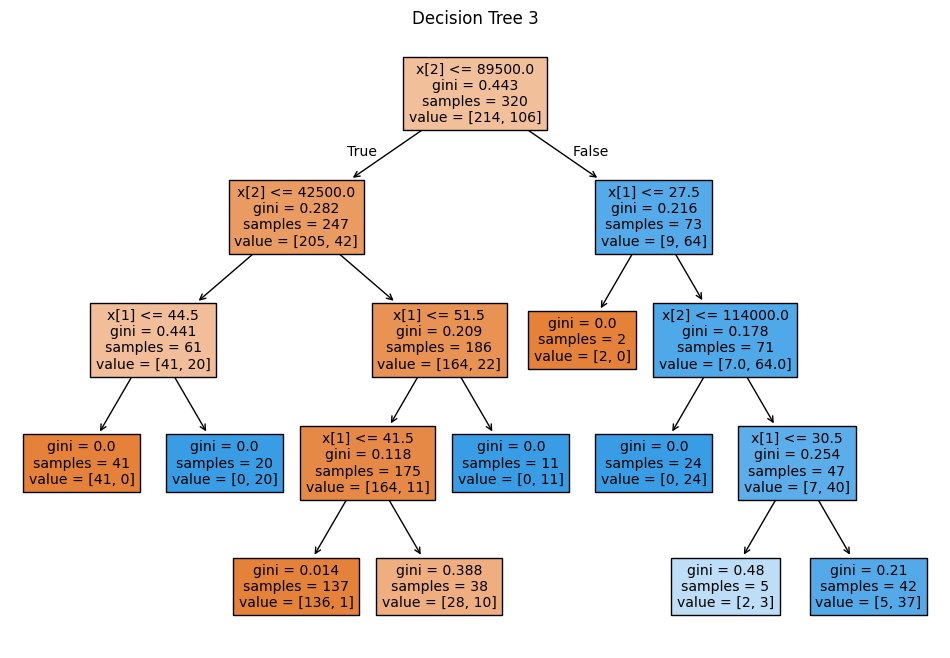

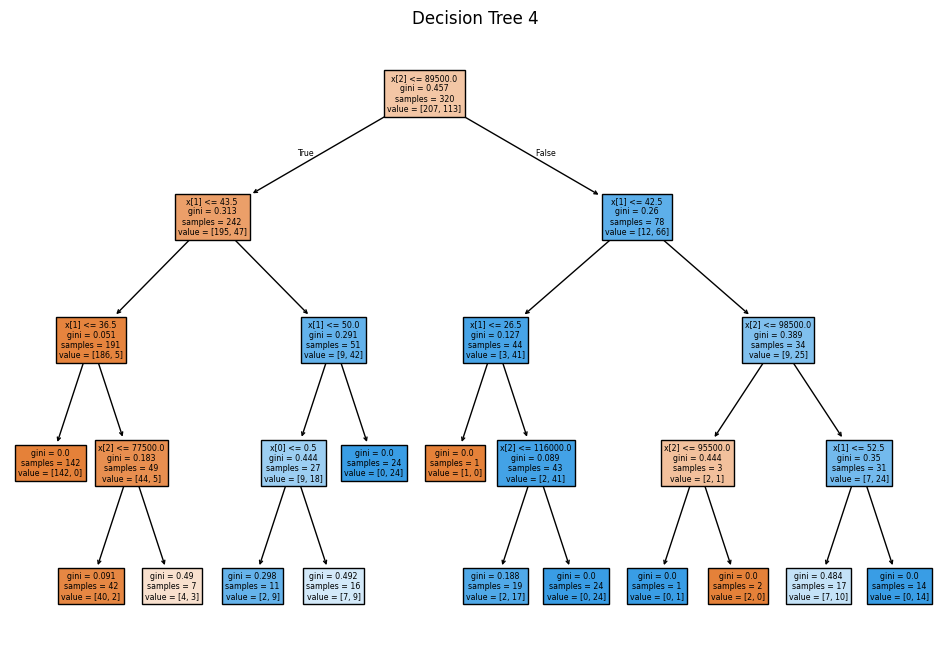

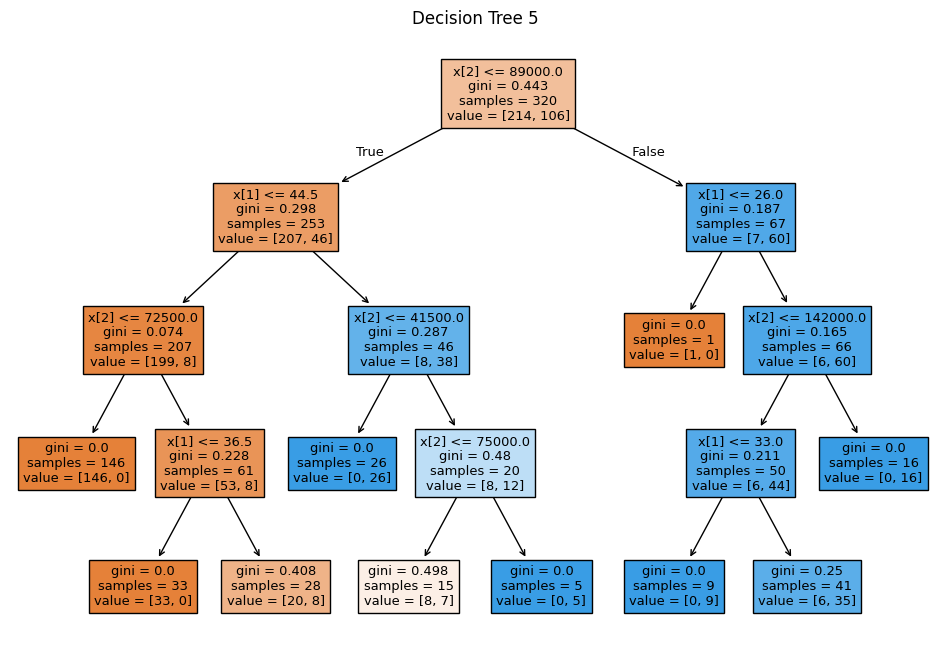

In [21]:
for i in range(5):
    rf2.plot_tree(i)